In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

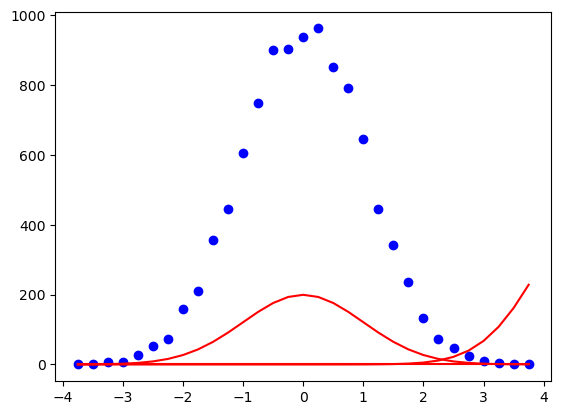

In [16]:
"""
1. Generate synthetic data from a 3-mode gaussian mixture model
"""

# parameter values and sample size
n = 10000  # sample size
means = np.array([0, 5, 10])  # mode means
vars = np.array([1, 1, 1])  # mode variances
p = np.array([0.2, 0.5, 0.3])  # mixing parameters

# assign labels
nk = (p * n).astype(int)
z = np.concatenate([np.ones(nk[0]), 2 * np.ones(nk[1]), 3 * np.ones(nk[2])])
x1 = means[0] + np.random.randn(nk[0]) * np.sqrt(vars[0])
x2 = means[0] + np.random.randn(nk[1]) * np.sqrt(vars[1])
x3 = means[0] + np.random.randn(nk[2]) * np.sqrt(vars[2])
x  = np.concatenate([x1, x2, x3])

# # visualize the data and the generative model
ux = np.arange(min(x), max(x) + 0.25, 0.25)
hx, edges = np.histogram(x, bins=ux)
ux = (edges[:-1] + edges[1:]) / 2
plt.figure(1)
plt.plot(ux, hx, 'bo')
for i in range(len(means)):
    plt.plot(ux, (n * p[i] / 4) * norm.pdf(ux, means[i], np.sqrt(vars[i])), 'r-')

plt.show()

z_true  = z
mean_true = means
var_true = vars
p_true  = p

logL = -220574.92774447112
means = [-3.8750767919651556, 0.003637396142190341, 3.733881666247334]
vars = [1, 1, 1]
p = [0.33333333 0.33333333 0.33333333]
[  2   2   6   6  27  52  73 158 211 355 445 605 748 901 904 938 962 851
 792 645 444 342 236 134  74  48  23   9   4   2   1]
[-3.87507679 -3.62507679 -3.37507679 -3.12507679 -2.87507679 -2.62507679
 -2.37507679 -2.12507679 -1.87507679 -1.62507679 -1.37507679 -1.12507679
 -0.87507679 -0.62507679 -0.37507679 -0.12507679  0.12492321  0.37492321
  0.62492321  0.87492321  1.12492321  1.37492321  1.62492321  1.87492321
  2.12492321  2.37492321  2.62492321  2.87492321  3.12492321  3.37492321
  3.62492321  3.87492321]


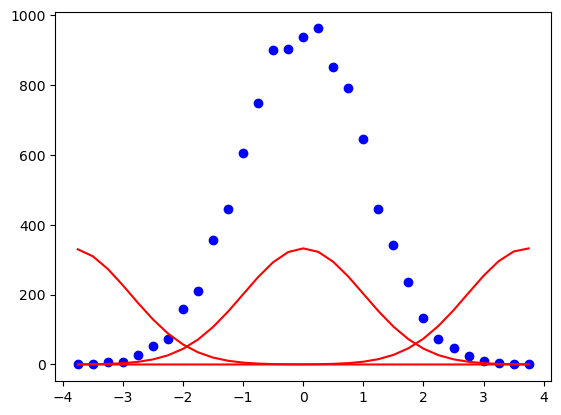

In [20]:
"""
2. Estimate the parameters via EM
"""

# initial conditions
means = [min(x), np.median(x), max(x)] # initial means
vars = [1, 1, 1,] # initial variances
p = np.ones(3) / 3  # initial p_k proportions
logL = np.zeros(10)  # logL values

# initial log-likelihood
Nxi = np.column_stack([norm.pdf(x, means[i], np.sqrt(vars[i])) for i in range(len(means))])
logL[0] = np.sum(np.log(p * Nxi))

print(f'logL = {logL[0]}')
print(f'means = {means}')
print(f'vars = {vars}')
print(f'p = {p}')

ux = np.arange(np.min(x), np.max(x) + 0.25, 0.25)
hx, edges = np.histogram(x, bins=ux)
ux = (edges[:-1] + edges[1:]) / 2
plt.figure(1)
plt.plot(ux, hx, 'bo')
for i in range(len(means)):
    plt.plot(ux, (n * p[i] / 4) * norm.pdf(ux, means[i], np.sqrt(vars[i])), 'r-')
plt.show()

[1] logL = -251108.48
mu = [-1.9386432371115987, -0.006052686884221145, 1.8501588256652932]
vr = [0.31481240992317744, 0.7396904398311206, 0.32878945124211534]
p  = [0.04126496 0.9122982  0.04643684]


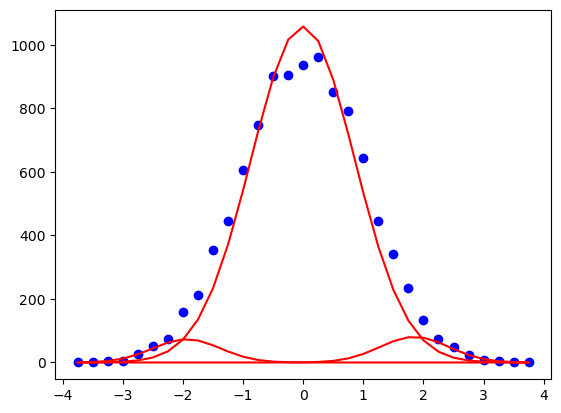

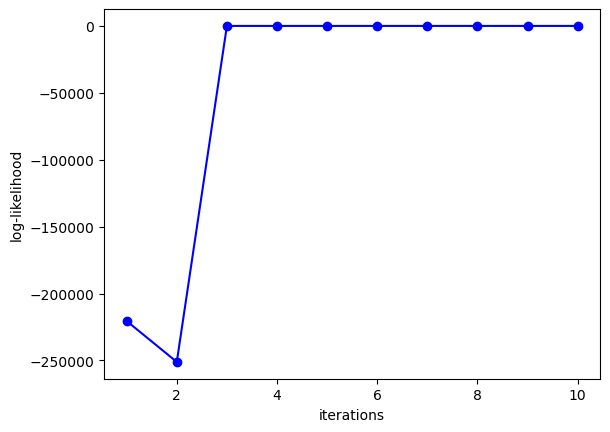

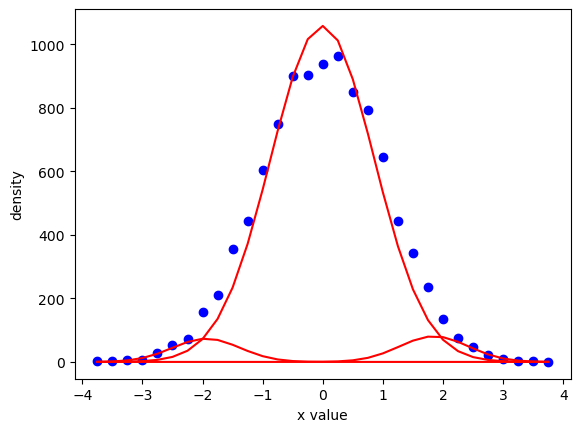

In [22]:
gz = np.zeros((n, len(means)))
for jj in range(1, len(logL) + 1):
  # E-step: calculate the posterior probabilities
  for i in range(len(x)):
    gz[i, :] = p * norm.pdf(x[i], means, np.sqrt(vars))
    gz[i, :] /= np.sum(gz[i, :])

  # M-step: estimate gaussian parameters
  nk = np.sum(gz, axis=0)
  mu = [(1.0 / nk[j]) * np.sum(gz[:, j] * x) for j in range(len(mu))]
  vr = [(1.0 / nk[j]) * np.sum(gz[:, j] * (x - mu[j]) ** 2) for j in range(len(vr))]
  p = nk / n

  # update likelihood
  Nxi = np.column_stack([norm.pdf(x, means[i], np.sqrt(vars[i])) for i in range(len(means))])
  logL[jj] = np.sum(np.log(p * Nxi))

  print(f'[{jj}] logL = {logL[jj]:8.2f}')
  print(f'mu = {mu}')
  print(f'vr = {vr}')
  print(f'p  = {p}')

  plt.figure(1)
  plt.plot(ux, hx, 'bo')
  for i in range(len(mu)):
      plt.plot(ux, (n * p[i] / 4) * norm.pdf(ux, mu[i], np.sqrt(vr[i])), 'r-')
  plt.show()

  # Convergence check
  if (logL[jj] - logL[jj - 1]) < 0.05:
      break
  jj += 1

# Plot the likelihood function over time
plt.figure(2)
plt.plot(np.arange(1, len(logL) + 1), logL, 'bo-')
plt.xlabel('iterations')
plt.ylabel('log-likelihood')
plt.show()

# Visualize the final model
ux = np.arange(np.min(x), np.max(x) + 0.25, 0.25)
hx, edges = np.histogram(x, bins=ux)
ux = (edges[:-1] + edges[1:]) / 2  # Adjusting bins to get midpoints

plt.figure(1)
plt.plot(ux, hx, 'bo')
for i in range(len(mu)):
    plt.plot(ux, (n * p[i] / 4) * norm.pdf(ux, mu[i], np.sqrt(vr[i])), 'r-')
plt.xlabel('x value')
plt.ylabel('density')
plt.show()